1. Data Collection!

In [126]:
from codecs import ignore_errors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import glob

In [128]:
glob.glob(r'C:\Users\Usuario\Desktop\Proyectos\StockMarket_Case_study\individual_stocks_5yr/*csv')

['C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_st

In [129]:
len(glob.glob(r'C:\Users\Usuario\Desktop\Proyectos\StockMarket_Case_study\individual_stocks_5yr/*csv'))

505

In [130]:
company_list=[
    r'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\GOOG_data.csv',
     r'C:\\Users\\Usuario\\Desktop\\Proyectos\\StockMarket_Case_study\\individual_stocks_5yr\\MSFT_data.csv'
]

In [131]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [132]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)
## full_df= pd.concat([full_df,current_df], ignore_index=True)

In [133]:
all_data.shape

(4752, 7)

In [134]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [135]:
all_data['Name'].unique()

<StringArray>
['AAPL', 'AMZN', 'GOOG', 'MSFT']
Length: 4, dtype: str

2. Analysing change in price of the stock overtime !

In [136]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [137]:
all_data.dtypes

date          str
open      float64
high      float64
low       float64
close     float64
volume      int64
Name          str
dtype: object

In [138]:
all_data['date']= pd.to_datetime(all_data['date'])

In [139]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[us]

In [140]:
tech_list= all_data['Name'].unique()

In [141]:
tech_list

<StringArray>
['AAPL', 'AMZN', 'GOOG', 'MSFT']
Length: 4, dtype: str

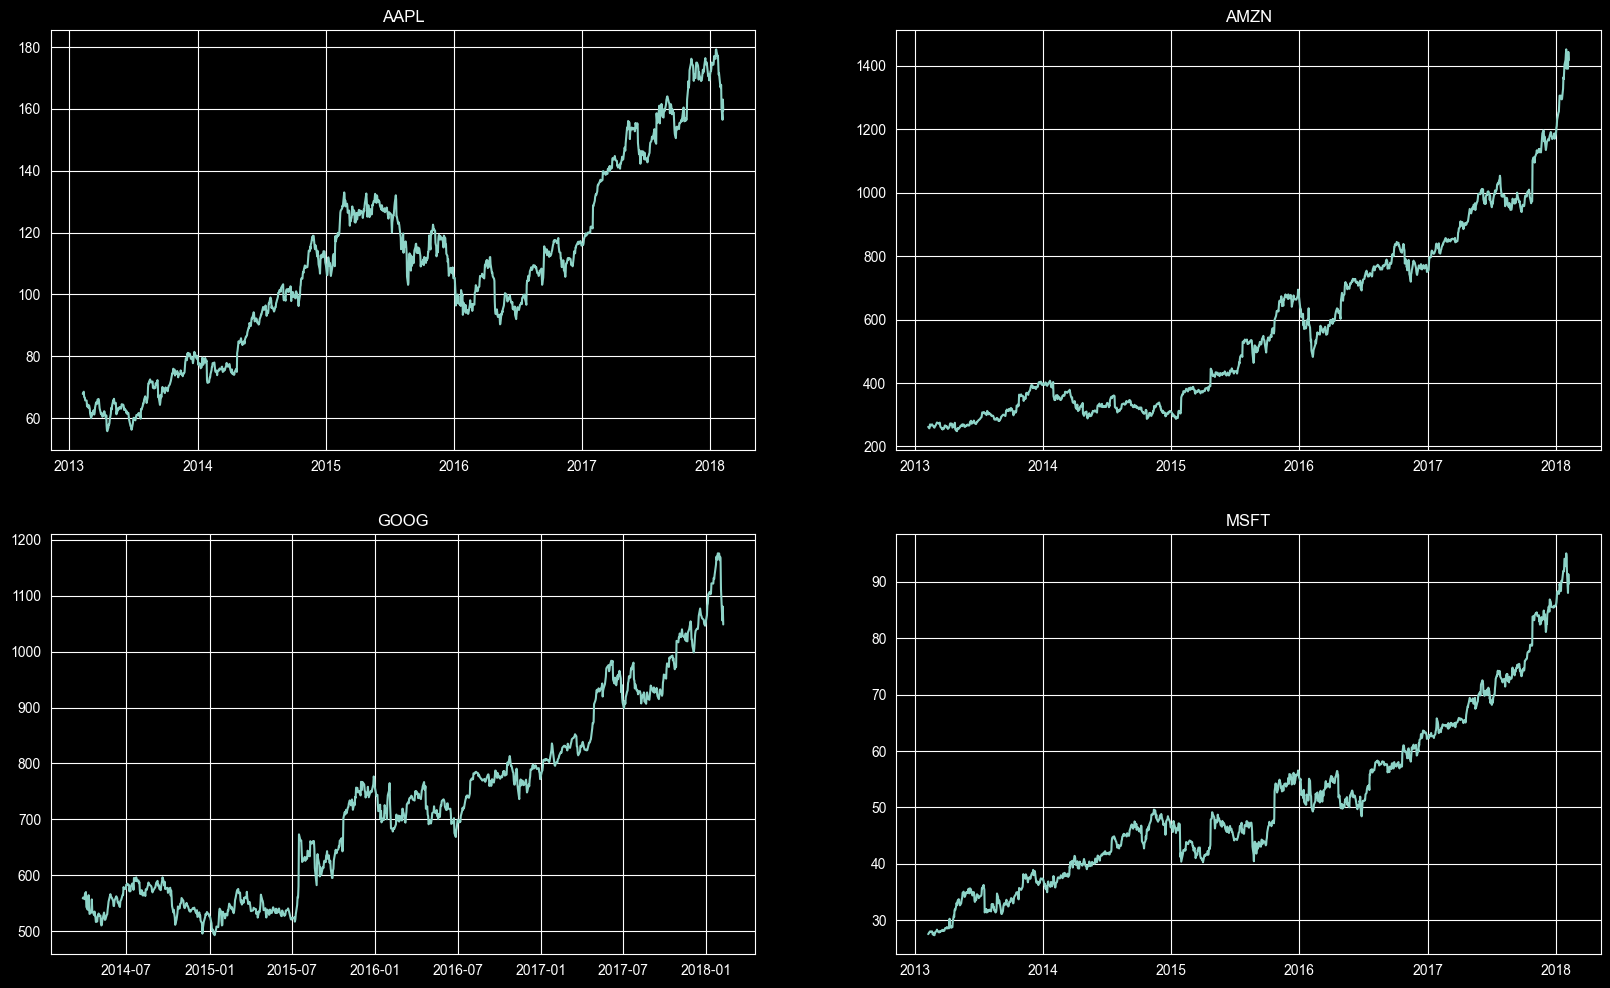

In [142]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

3. Whats wasthe moving average of the various stocks?

In [143]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [144]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [145]:
new_data= all_data.copy()

In [146]:
ma_day=[10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [147]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [148]:
new_data.set_index('date', inplace=True)

In [149]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [150]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='str')

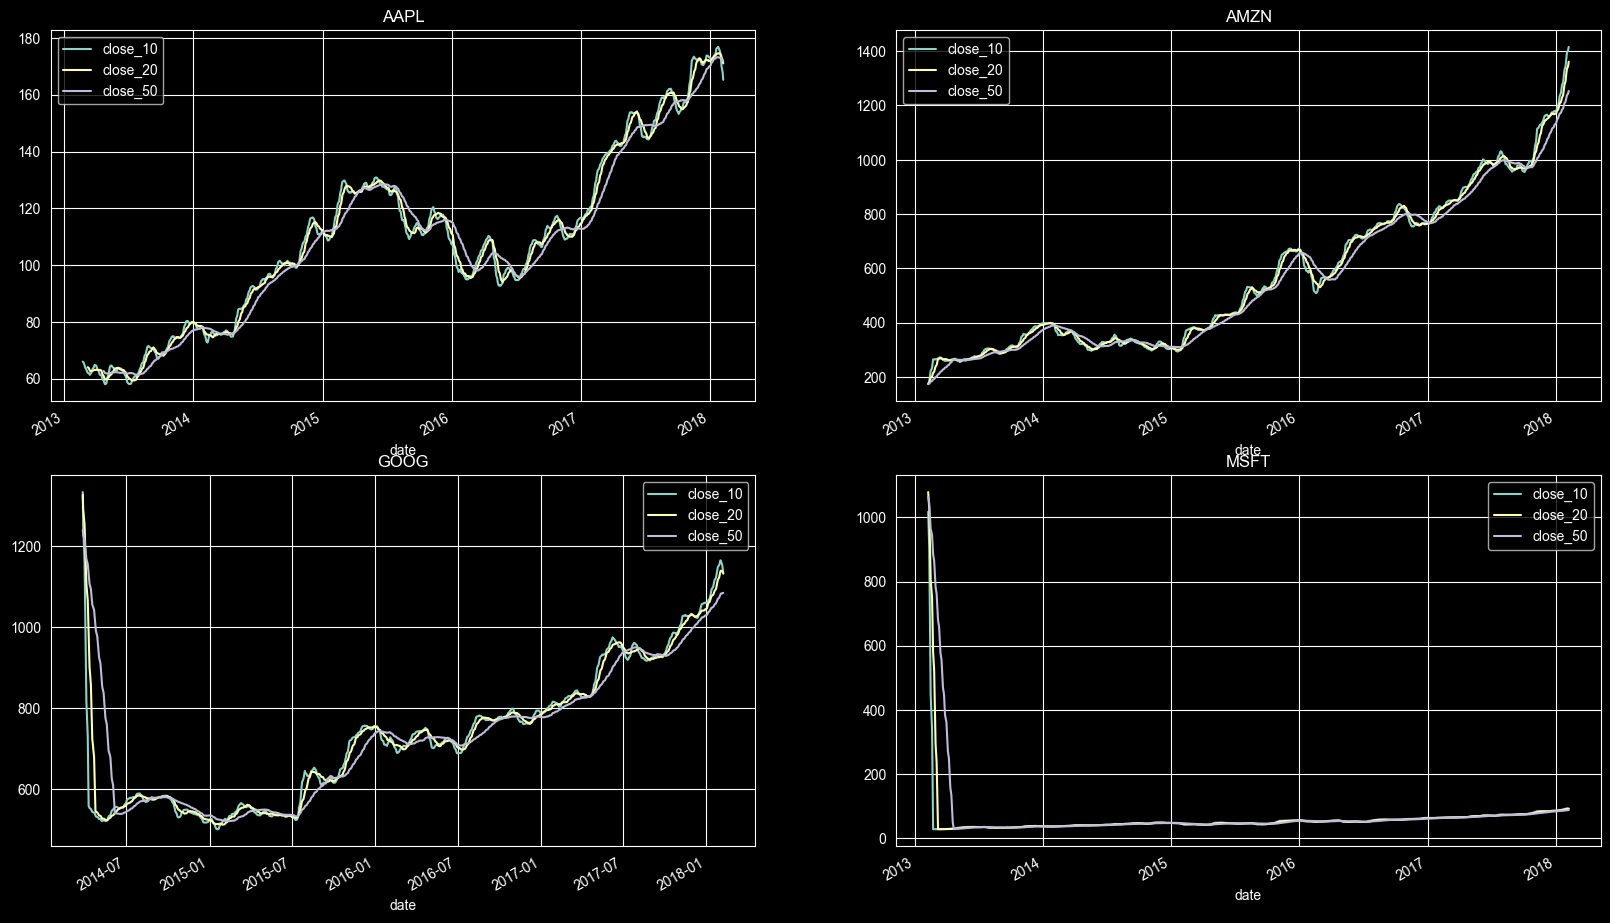

In [151]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

4. Analyse Closing price change in apple stock

In [152]:
company_list

['C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [153]:
apple= pd.read_csv(r'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [154]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [155]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [156]:
apple['Daily_return(in %)']=apple['close'].pct_change()*100

In [157]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily_return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [158]:
import plotly.express as px

In [159]:
px.line(apple, x='date', y='Daily_return(in %)')

5. perfoming resampling analysis of closing price.

In [160]:
apple.dtypes

date                      str
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                      str
Daily_return(in %)    float64
dtype: object

In [161]:
apple['date']= pd.to_datetime(apple['date'])

In [162]:
apple.dtypes

date                  datetime64[us]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                             str
Daily_return(in %)           float64
dtype: object

In [163]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily_return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [164]:
apple.set_index('date', inplace=True)

In [165]:
apple.head(4)

,open,high,low,close,volume,Name,Daily_return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [166]:
apple['close'].resample('ME').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

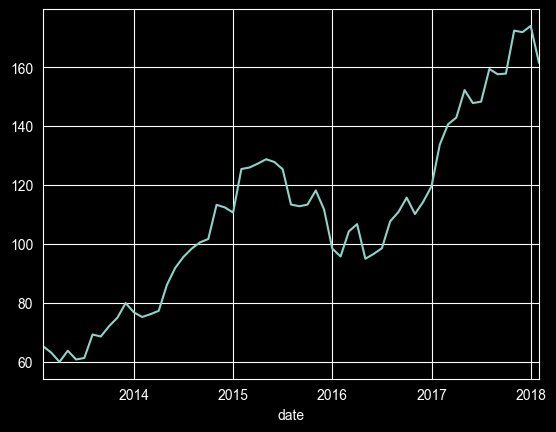

In [167]:
apple['close'].resample('ME').mean().plot()


In [168]:
apple['close'].resample('YE').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

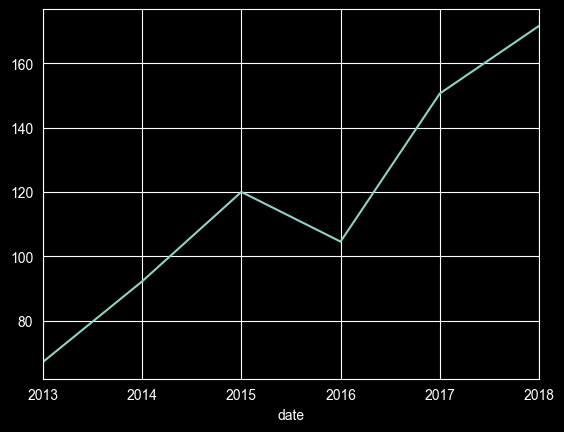

In [169]:
apple['close'].resample('YE').mean().plot()

In [170]:
apple['close'].resample('QE').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

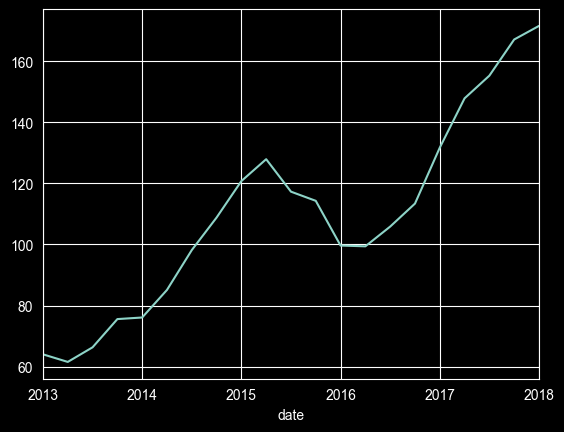

In [171]:
apple['close'].resample('QE').mean().plot()

6. Checking if the closing prices of these thech(Amazon, Apple, Google, Microsoft) companies are correlated or not!

In [172]:
company_list

['C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [173]:
company_list[0]

'C:\\\\Users\\\\Usuario\\\\Desktop\\\\Proyectos\\\\StockMarket_Case_study\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [174]:
app= pd.read_csv(company_list[0])
amzn= pd.read_csv(company_list[1])
google= pd.read_csv(company_list[2])
msft= pd.read_csv(company_list[3])

In [175]:
closing_price=pd.DataFrame()

In [176]:
closing_price['apple_close']=app['close']
closing_price['amzn_close']=amzn['close']
closing_price['goog_close']=google['close']
closing_price['msft_close']=msft['close']

In [177]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


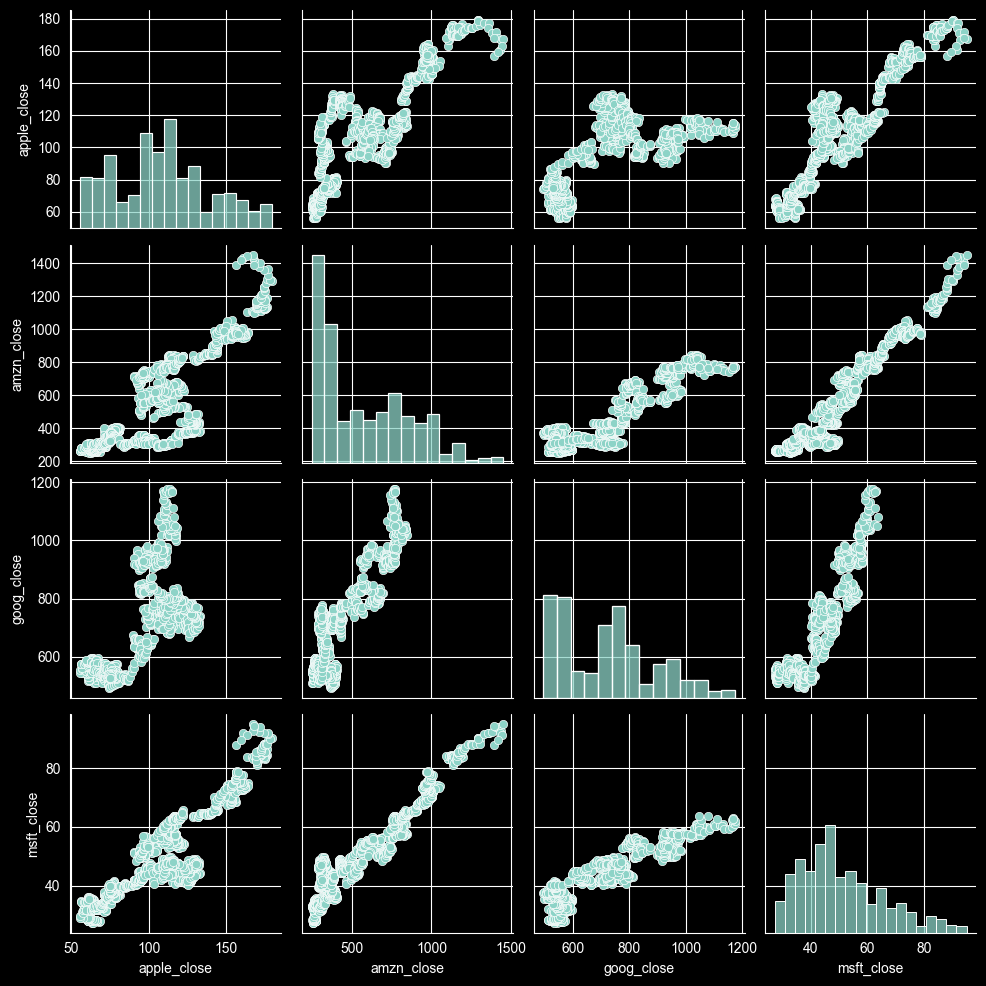

In [178]:
sns.pairplot(closing_price)

In [179]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

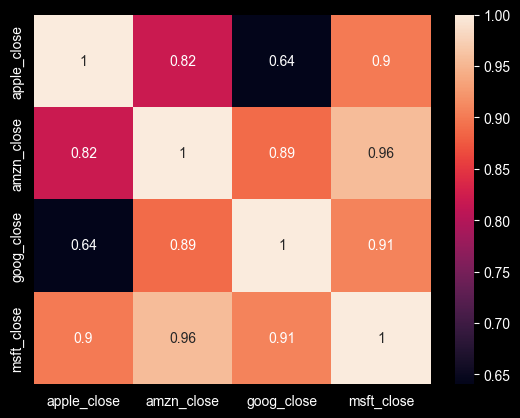

In [180]:
sns.heatmap(closing_price.corr(), annot=True)

7.Analyse Whether Daily change in Closing price of stocks or Daily Returns in stocks are co-related or not!

In [181]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [182]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [183]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [185]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [189]:
for col in closing_price.columns:
    closing_price[col + '_pct_change']= (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [190]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [191]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='str')

In [193]:
clsing_p= closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [194]:
clsing_p

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


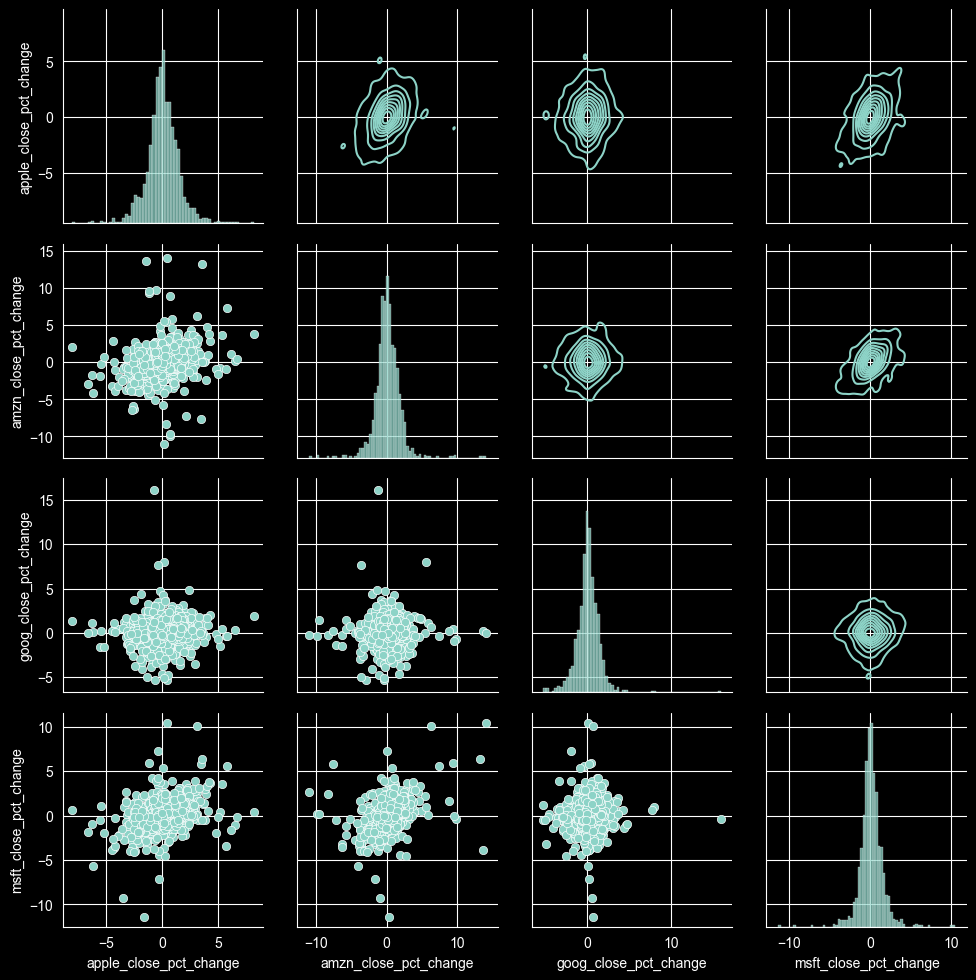

In [196]:
g= sns.PairGrid(data=clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [197]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000
